# CE282: Linear Algebra

## Final Project

Full Name: Taraneh Khosrojerdi

Student ID: 400104929


## Q2: Image Processing (100 Points)

# Introduction

In this exercise, we are going to examine two applications of the basis shift tools that were discussed in class (SVD and FFT) in digital image processing.


One of the issues we are investigating is image compression. For this purpose, in general, the information inside the image can be considered as a data matrix, then, in a way, suitable bases for this information matrix are found. The primary image is displayed with less information by depicting the primary matrix on a more important basis and keeping the necessary information. Data and compression in practice. For the sake of simplicity, the images we are considering in this exercise are considered black and white. Still, the methods under consideration can be implemented simply and by changing the shape of the tensors of multi-channel (color) images.


With the help of SVD, we can find bases for the column space of the matrix of our desired image on which the columns of our image have the highest correlation. From the point of view of these bases in the descending order of the size of the singular values, they will contain the most general information of the columns of the image, so by keeping only $r$ initial columns of the found bases ($U$) along with the combined vectors ($V^T$) and singular values ($\Sigma$) corresponding to them, we can keep a good approximation of the general image. From the expert point of view, the reconstruction that has been done is actually a kind of reconstruction of the primary matrix in the lower order (rank approximation) that you were familiar with before. The amount of

In this view, $r$ is the control valve for the amount of compression we want.


With the help of FFT and Fourier transform, we can also consider the information in the rows and columns of our image matrix as two-dimensional discrete signal values and image it in the space of two-dimensional fundamental and periodic wave bases. It can be shown that the larger size of the image vector in the direction of a certain wave means the greater importance of that wave in the formation of patterns in the image ([Read more](https://en.wikipedia.org/wiki/Parseval%27s_identity)), so keeping $r$ of the basic wave in which the size of the image vector is the largest in their direction can be used to reconstruct the image information. For image compression, a good approximation should be used. In this view, the $r$ value of the control valve will be the compression rate we want.


Another issue that we can explore with a similar idea of applying the described base transform is image denoising. In the condition that the noise in the image is uniform and in such a way that it does not distort the general information in the image, from the point of view of SVD, according to the examination of the general information, the direction of the image vector based on bases with more singular values has not changed much, and the information related to the vectors having less importance can remove noise and keep the original information of the image. From the point of view of FFT, considering that the noise pattern is generally modeled with high-frequency waves, keeping the constitutive waves containing the lower frequency in the image can separate the image information from the noise (this is called low-pass filtering).

## 0. Prerequisites and Imports

Install the required packages (if not already installed):

In [6]:
!pip install numpy
!pip install matplotlib
!pip install pillow # for manipulating image files

In [7]:
import numpy as np
from matplotlib import pyplot as plt
import PIL
from PIL import Image

# Display inputs

In the following cell, you have to display the images. The input images are in the directory of `./images`.

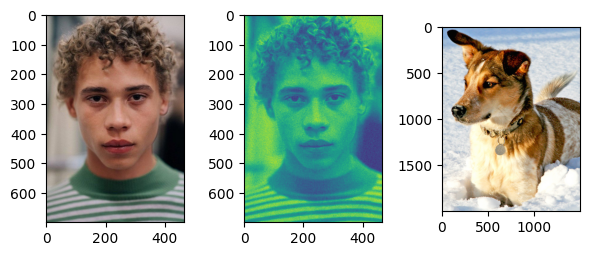

In [8]:
#####################################################
#                                                   #
#                  Code here                        #
#                                                   #
#####################################################
original = Image.open('/content/drive/MyDrive/original.JPG')
noisy = Image.open('/content/drive/MyDrive/noisy.jpg')
dog = Image.open('/content/drive/MyDrive/dog.jpg')
figure, axes = plt.subplots(1, 3, figsize=(6, 3))
axes[0].imshow(original)
axes[1].imshow(noisy)
axes[2].imshow(dog)
plt.tight_layout()
plt.show()

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 1. Image Compression
Using SVD (you can use `np.linalg.svd`) and 2D-FFT (which will be explained in details later), Compress the `original.jpg` image with compression rates of $0.1$, $0.5$, $1$, $5$ and $10$%. Then visualize the resulting compressed images of the two algorithms against one another and investigate each basis change's effectiveness in capturing more meaningful patterns of images.

The 2D Fourier transform of a data matrix can be achieved by ﬁrst applying the 1D Fourier transform to every row of the matrix, and then applying the 1D Fourier transform to every column of the intermediate matrix. This process is depicted below. `np.fft.fft2` applys a 2D Fourier transformation to the provided matrix by employing the Fast Fourier Transformation algorithm.

<img style="margin: auto;" width="45%" src="./samples/2dfft.png">

The Fourier coefficients are zero-centered by definition, and although it does not affect the result of the transformation followed by its inverse, in general, it is more convenient to have them centered around the middle point of the transformation matrix. `np.fft.fftshift` does the described shift two a provided Discrete-Fourier transformation matrix.

Your results may look as follows:

<img style="margin: auto;" width="80%" src="./samples/compression.jpg">

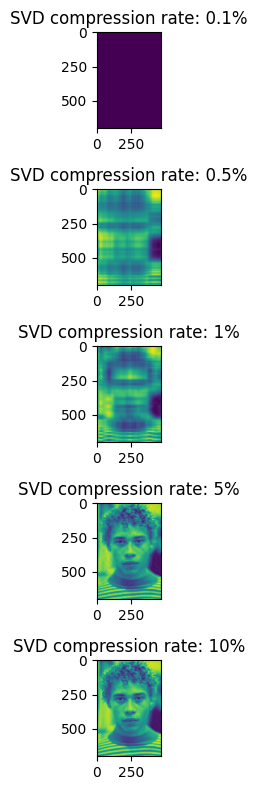

In [10]:
# use svd with different compress rates and display each output result
#####################################################
rates = [0.1, 0.5, 1, 5, 10]
svd_images = []
original_array = np.array(original.convert('L'))
U, S, V = np.linalg.svd(original_array)

plt.figure(figsize=(12,  8))

for i in range(len(rates)):
    rate = rates[i]
    n = int(rate/100 *  min(original_array.shape))
    svd_image = U[:, :n] @ np.diag(S[:n]) @ V[:n, :]
    svd_images.append(svd_image)

    plt.subplot(5, 2, 2*i + 1)
    plt.imshow(svd_image)
    plt.title(f'SVD compression rate: {rate}%')

plt.tight_layout()
plt.show()
####################################################

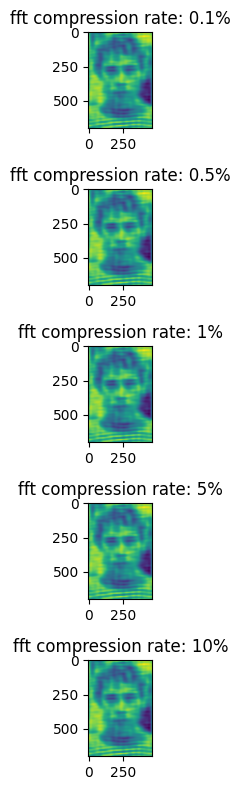

In [11]:
# use fft2 with different compress rates and display each output result
#####################################################
fft_images = []
fft_array = np.fft.fftshift(np.fft.fft2(original_array))
plt.figure(figsize=(12,  8))

for i in range(len(rates)):
    rate = rates[i]
    threshold = np.percentile(np.abs(fft_array), 100 - rate)
    fft_array[np.abs(fft_array) < threshold] = 0
    fft_comressed_array = np.fft.ifft2(np.fft.ifftshift(fft_array)).real
    fft_images.append(fft_comressed_array)

    plt.subplot(5, 2, 2*i + 2)
    plt.imshow(fft_images[i])
    plt.title(f'fft compression rate: {rate}%')

plt.tight_layout()
plt.show()
#####################################################

Which change of basis seems to do better when it comes to image compression? Briefly elaborate on what makes that change of basis more suited for images?

It seems like 2D FFT performs a better compression on images.

2D FFT uses the frequency information to compress image. In this algorithm we keep largest coefficients, and set the others to zero. While in SVD, singular values and singular vectors are used. As these vectors span the image's column space, it is underestandable that the SVD compressed the image using correlation and redundancy data.

Due to its ability to determine frequency and understanding of structured patterns which are used more in the image, 2D FFT performs a better image compression than SVD.




# 2. Image Denoising

Through the same process as the previous section and by empirically finding an optimal rank threshold for the SVD vectors, denoise the provided image. Your results may look as follows:

<img style="margin: auto;" width="80%" src="./samples/svdd.jpg">

It is shown that SVD can be an effective denoising strategy when the underlying data is of low rank initially, but as observable from the example, raw SVD does not seem to be useful when it comes to denoising natural images.

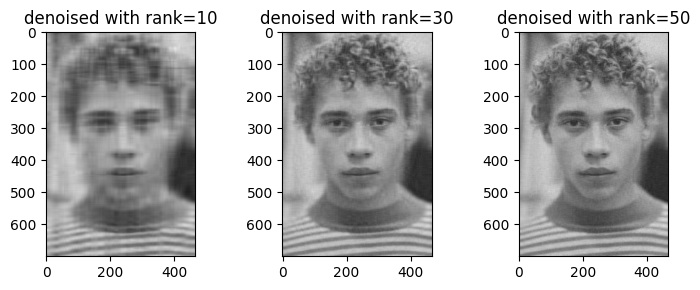

In [20]:
# Using SVD, denoise the noisy image that is in the images directory.
# You have to try at least 3 different ranks.
#####################################################
noisy_array = np.array(noisy)
ranks = [10, 30, 50]

plt.figure(figsize=(12, 3))
plt.subplot(1, 5, 2)
plt.imshow(noisy)
plt.title("noisy image")

for i in range(len(ranks)):
  rank = ranks[i]
  U, S, V = np.linalg.svd(noisy_array)
  denoised_array =  U[:, :rank] @ np.diag(S[:rank]) @ V[:rank, :]
  denoised_image = Image.fromarray(denoised_array)

  plt.subplot(1, 5 , i + 1)
  plt.imshow(denoised_image)
  plt.title(f'denoised with rank={rank}')

plt.tight_layout()
plt.show()

#####################################################

The FFT is extensively used for denoising and filtering signals, as it is straightforward to isolate and manipulate particular frequency bands. It is observed that the noise is especially pronounced in high-frequency modes, therefore zero out any Fourier coefﬁcient outside of a radius containing low frequencies. You can find the approximate optimal filtering radius through trials and errors empirically. A sample denoised image is shown below:

<img style="margin: auto;" width="50%" src="./samples/fftd.jpg">

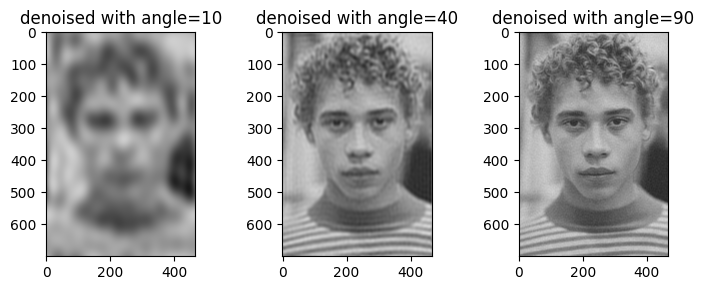

In [26]:
# Using fft, denoise the noisy image that is in the images directory.
# You have to try at least 3 different radiuses.
#####################################################
noisy_array = np.array(noisy)
angles = [10, 40, 90]

plt.figure(figsize=(12, 3))
plt.subplot(1, 5, 2)
plt.imshow(noisy)
plt.title("noisy image")

for i in range(len(angles)):
  angle = angles[i]
  noisy_fft = np.fft.fftshift(np.fft.fft2(noisy_array))
  shape = noisy_fft.shape
  y, x = np.ogrid[:shape[0], :shape[1]]
  param =  np.sqrt((y - (shape[0] // 2)) ** 2 + (x - (shape[1] // 2)) ** 2) <= angle
  denoised_image = Image.fromarray(np.abs(np.fft.ifft2(np.fft.ifftshift(noisy_fft * param))))

  plt.subplot(1, 5, i + 1)
  plt.imshow(denoised_image)
  plt.title(f'denoised with angle={angle}')

plt.tight_layout()
plt.show()
#####################################################